In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
pca2= PCA(n_components=2)
wine_pca2 =pca2.fit_transform(wine_std)

In [4]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=3,verbose=1,random_state=2023, n_init='auto')
Kmeans.fit(wine_std)

Initialization complete
Iteration 0, inertia 2548.417250768871.
Iteration 1, inertia 1337.4498210139172.
Iteration 2, inertia 1288.1962895450683.
Iteration 3, inertia 1281.2533740452782.
Iteration 4, inertia 1279.9661527749454.
Converged at iteration 4: strict convergence.


KMeans(n_clusters=3, n_init='auto', random_state=2023, verbose=1)

In [5]:
Kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [6]:
np.unique(Kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([64, 51, 63], dtype=int64))

In [7]:
df = pd.DataFrame(wine_pca2, columns=['PC1','PC2'])
df['target'] = wine.target
df['cluster'] =Kmeans.labels_
df

,PC1,PC2,target,cluster
0,3.316751,-1.443463,0,2
1,2.209465,0.333393,0,2
2,2.516740,-1.031151,0,2
3,3.757066,-2.756372,0,2
4,1.008908,-0.869831,0,2
...,...,...,...,...
173,-3.370524,-2.216289,2,1
174,-2.601956,-1.757229,2,1
175,-2.677839,-2.760899,2,1
176,-2.387017,-2.297347,2,1


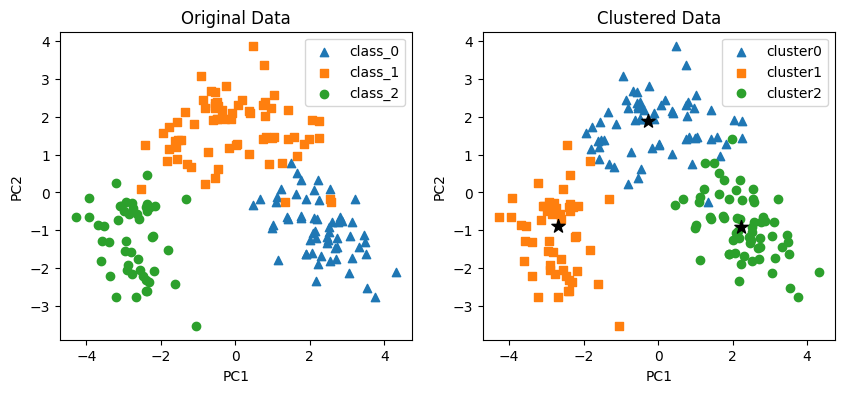

In [8]:
markers = ['^','s','o'] 
plt.figure(figsize=(10,4))
for k, column in enumerate(['target','cluster']):
    plt.subplot(1,2,k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0: 
            plt.scatter(x_data,y_data,marker=marker,label=wine.target_names[i])
        else:
            plt.scatter(x_data,y_data,marker=marker,label='cluster'+str(i))
            plt.scatter(x_data.median(),y_data.median(), marker='*', c='black', s=100)
    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    if k==0:
        plt.title("Original Data")
    else:
        plt.title("Clustered Data")

plt.show()

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_samples = silhouette_samples(wine_std, Kmeans.labels_)
df['실루엣 계수'] = sil_samples
df

,PC1,PC2,target,cluster,실루엣 계수
0,3.316751,-1.443463,0,2,0.452625
1,2.209465,0.333393,0,2,0.259681
2,2.516740,-1.031151,0,2,0.367654
3,3.757066,-2.756372,0,2,0.454494
4,1.008908,-0.869831,0,2,0.201984
...,...,...,...,...,...
173,-3.370524,-2.216289,2,1,0.456884
174,-2.601956,-1.757229,2,1,0.480548
175,-2.677839,-2.760899,2,1,0.435643
176,-2.387017,-2.297347,2,1,0.421967


In [14]:
silhouette_score(wine_std, Kmeans.labels_)

0.2844212860533542

In [15]:
df.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.181734
1,0.349784
2,0.335826


In [16]:
kmeans2 = KMeans(n_clusters=2, random_state=2023, n_init='auto')
kmeans2.fit(wine_std)
silhouette_score(wine_std, kmeans2.labels_)

0.25909304410550654

c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


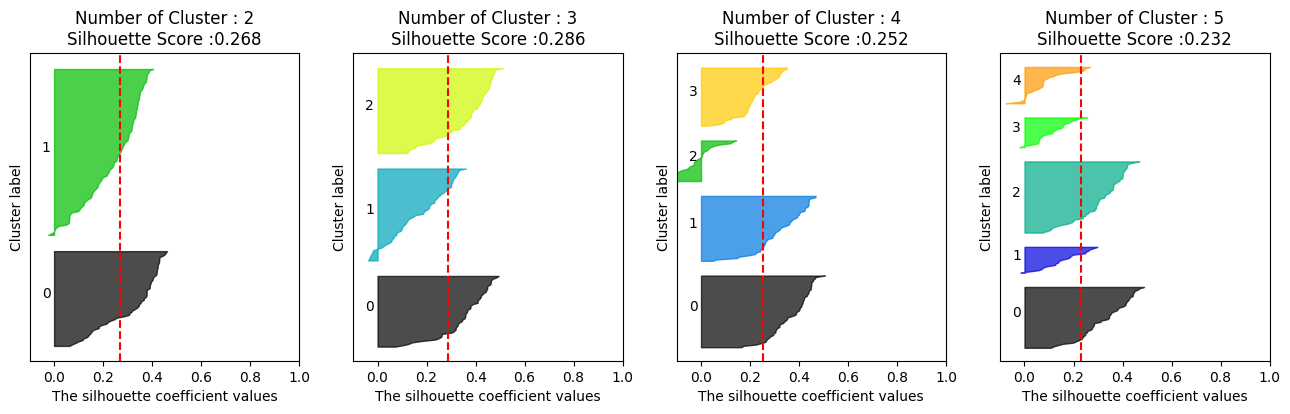

In [17]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5,], wine_std)